<a href="https://colab.research.google.com/github/jkeza1/distribution_grp1/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent using the https://alueducation.instructure.com/courses/1791/assignments/26459 assignment

In [ ]:
import numpy as np
from scipy.optimize import minimize

Using scipy to compute Gradient Descent. Using numpy only first to understand how scipy works.

In [ ]:
#initial data points
X = np.array([1, 3])
y = np.array([3, 6])

# Initialize parameters
m = -1.0
b = 1.0
alpha = 0.1
max_iters = 1000
tolerance = 1e-6

Initializing the list to store the values for visualization

In [ ]:
m_vals = []
b_vals = []
cost_vals =[]

Computing the cost function to find the Mean Square Error.

In [ ]:
def cost_function(m, b):
  y_pred = m*X + b
  mse = np.mean((y_pred - y)**2)
  return mse

Computing the gradients

In [ ]:
def gradients(m, b):
  y_pred = m*X + b
  n = len(X)
  dJ_dm = -2/n * np.sum((y_pred - y)* X)
  dJ_db = -2/n * np.sum((y - y_pred))
  return dJ_dm, dJ_db

Gradient Descent Loop

In [ ]:
prev_cost = cost_function(m, b)

For loop for the iterations when computing. The values of the parameters with the current learning rate were diverging greatly even with changes to tolerance and the number of iterations leading to an overflow error. The other two computation methods work seamlessly, I just utilized this to understand how it works.

In [ ]:
"""for i in range(max_iters):
    dJ_dm, dJ_db = gradients(m, b)  # Compute gradients
    m -= alpha * dJ_dm  # Update slope
    b -= alpha * dJ_db  # Update intercept

    # Store values for visualization
    m_vals.append(m)
    b_vals.append(b)
    cost = cost_function(m, b)
    cost_vals.append(cost)

    # Check for convergence
    if abs(prev_cost - cost) < tolerance:
        print(f"Converged at iteration {i+1}")
        break
    prev_cost = cost

print(f"Final values: m = {m:.4f}, b = {b:.4f}")"""

Final values: m = -1.2816, b = 1.1144


Plotting the iterations to understand convergence

In [ ]:
"""plt.figure(figsize=(12, 5))

# Plot m updates
plt.subplot(1, 2, 1)
plt.plot(m_vals, label="m values")
plt.xlabel("Iteration")
plt.ylabel("m")
plt.title("Change in m over iterations")
plt.legend()

# Plot b updates
plt.subplot(1, 2, 2)
plt.plot(b_vals, label="b values", color='m')
plt.xlabel("Iteration")
plt.ylabel("b")
plt.title("Change in b over iterations")
plt.legend()

plt.show()"""

'plt.figure(figsize=(12, 5))\n\n# Plot m updates\nplt.subplot(1, 2, 1)\nplt.plot(m_vals, label="m values")\nplt.xlabel("Iteration")\nplt.ylabel("m")\nplt.title("Change in m over iterations")\nplt.legend()\n\n# Plot b updates\nplt.subplot(1, 2, 2)\nplt.plot(b_vals, label="b values", color=\'m\')\nplt.xlabel("Iteration")\nplt.ylabel("b")\nplt.title("Change in b over iterations")\nplt.legend()\n\nplt.show()'

Now to use Scipy to solve the same problem.In linear regression, the goal is to find the values of the model parameters (e.g. the coefficients of the features) that minimize the mean squared error (MSE) between the predicted values and the true values.The gradient is a vector that points in the direction of the steepest increase in the cost function. In gradient descent, the parameters are updated in the direction of the negative gradient, which is the direction of steepest decrease in the cost function.

Final optimized values: m = 1.5000, b = 1.5000
Final cost: 0.000000


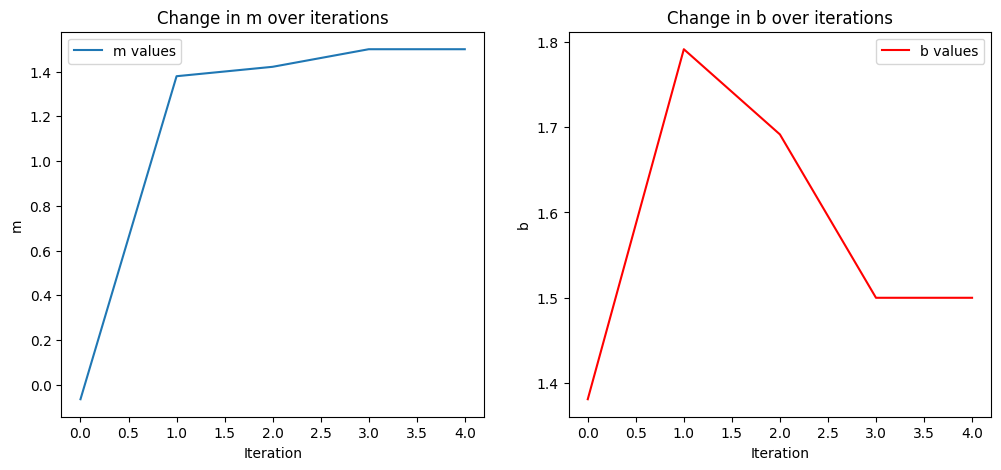

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data points
X = np.array([1, 3])
y = np.array([3, 6])

# Initialize parameters
initial_m = -1.0
initial_b = 1.0

# Define cost function (Mean Squared Error)
def cost_function(params):
    m, b = params
    y_pred = m * X + b
    mse = np.mean((y - y_pred) ** 2)
    return mse

# Compute gradients (partial derivatives)
def compute_gradients(params):
    m, b = params
    y_pred = m * X + b
    n = len(X)
    dJ_dm = -2/n * np.sum((y - y_pred) * X)
    dJ_db = -2/n * np.sum(y - y_pred)
    return np.array([dJ_dm, dJ_db])

# Store history for visualization
m_history = []
b_history = []
cost_history = []

# Custom callback function to track optimization progress
def callback(params):
    m_history.append(params[0])
    b_history.append(params[1])
    cost_history.append(cost_function(params))

# Use SciPy's minimize function
result = minimize(
    fun=cost_function,
    x0=[initial_m, initial_b],
    method='BFGS',
    jac=compute_gradients,
    callback=callback
)

# Final optimized parameters
optimized_m, optimized_b = result.x
print(f"Final optimized values: m = {optimized_m:.4f}, b = {optimized_b:.4f}")
print(f"Final cost: {cost_function(result.x):.6f}")

# Plot optimization progress
plt.figure(figsize=(12, 5))

# Plot m updates
plt.subplot(1, 2, 1)
plt.plot(m_history, label="m values")
plt.xlabel("Iteration")
plt.ylabel("m")
plt.title("Change in m over iterations")
plt.legend()

# Plot b updates
plt.subplot(1, 2, 2)
plt.plot(b_history, label="b values", color='r')
plt.xlabel("Iteration")
plt.ylabel("b")
plt.title("Change in b over iterations")
plt.legend()

plt.show()


Confirmation of the coefficients using statsmodel

In [ ]:
import statsmodels.api as sm
X_bias = np.c_[np.ones(len(X)), X]
ols_model = sm.OLS(y, X_bias).fit()
print("\nOLS Coefficients:")
print(ols_model.params)


OLS Coefficients:
[1.5 1.5]


## Insights
I tried using a for loop initially to understand the computation of the gradient descent and visualize the variation in the parameters after the subsequent iterations. It took me down a rabbit hole to understand convergence and divergence. I tried the various solutions offered when the values of m and b are so large that an overflow error occurs. It included reducing the learning rate which allowed it to get close to the 1.5 value computed by the ols and scipy as a fixed learning rate makes the for loop diverge. From my research, scipy is encouraged because it is a more stabilized optimization technique. Scipy adjusts the learning rate automatically preventing overshooting or a too slow convergence. Scipy also utilizes better algorithms such as the BFGS to compute- it is more stable. It also incorporates momentum like Adam and RMS Prop, in its computations. Momentum is a technique that smooths out updates in gradient descent by incorporating previous gradients into the current update. This prevents oscillations and improves convergence, especially in cases where gradients vary significantly which ties to the visualization in this notebook significantly as there were sharp changes in gradient.
